<a href="https://colab.research.google.com/github/Asif-Miah1/Language-Classes_Analysis_Notebook.ipynb/blob/main/Language_Classes_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

step 2 load data

In [15]:
df = pd.read_csv('Language Classes.csv')
output = []
output.append("Exploratory Data Analysis of Language Classes\n,")
output.append("=================================\n")

step 3 Explore tha data

In [16]:
print(df.head())
output.append(f"First few rows:\n {df.head()}\n")

         Date   Product Region Customer_Type  Quantity   Price  Discount  \
0  2024-12-29   Spanish   West       Student        23   63.24      0.27   
1  2024-12-15   Spanish  South  Professional         9  223.05      0.24   
2  2024-01-20  Mandarin   West  Professional         2   61.87      0.09   
3  2024-04-19   Spanish  North  Professional        13  432.51      0.17   
4  2024-11-03  Mandarin  North       Student        12  460.02      0.25   

   Revenue  
0  1061.80  
1  1525.66  
2   112.60  
3  4666.78  
4  4140.18  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price          1000 non-null   float64
 6   Discount       1000 non-null   float64
 7   Revenue        1000 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [18]:
print(df.describe())
output.append(f"Summary statistics:\n {df.describe()}\n")

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     15.134000   269.077720     0.151330   3457.052440
std       8.588469   128.621881     0.087781   2780.718514
min       1.000000    50.280000     0.000000     45.770000
25%       7.000000   159.375000     0.080000   1254.150000
50%      15.000000   262.745000     0.150000   2617.705000
75%      22.000000   382.722500     0.230000   5076.942500
max      30.000000   499.310000     0.300000  12549.730000


step 4 analisis data

In [19]:
output.append(f"Data Cleaning Result\n")
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n {missing_values}\n")

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [20]:
df.dropna(inplace=True)

In [21]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
duplicate=df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicate}\n")
df.drop_duplicates(inplace=True)

5


In [25]:
total_revenue = df['Revenue'].sum()
output.append(f"Total Revenue: ${total_revenue}\n")
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $3457052.44


In [29]:
average_price_per_Service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price Per Customer Type:\n")
output.append(f"{average_price_per_Service}\n")
print(average_price_per_Service)

Customer_Type
Professional    265.804828
Student         272.285802
Name: Price, dtype: float64


In [32]:
total_Services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_Services_by_region}\n")
print(total_Services_by_region)

Region
North    267
West     252
East     250
South    231
Name: count, dtype: int64


In [33]:
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)


Region
East     69639.75
North    71859.74
South    61820.82
West     65757.41
Name: Price, dtype: float64


6 visualizetion

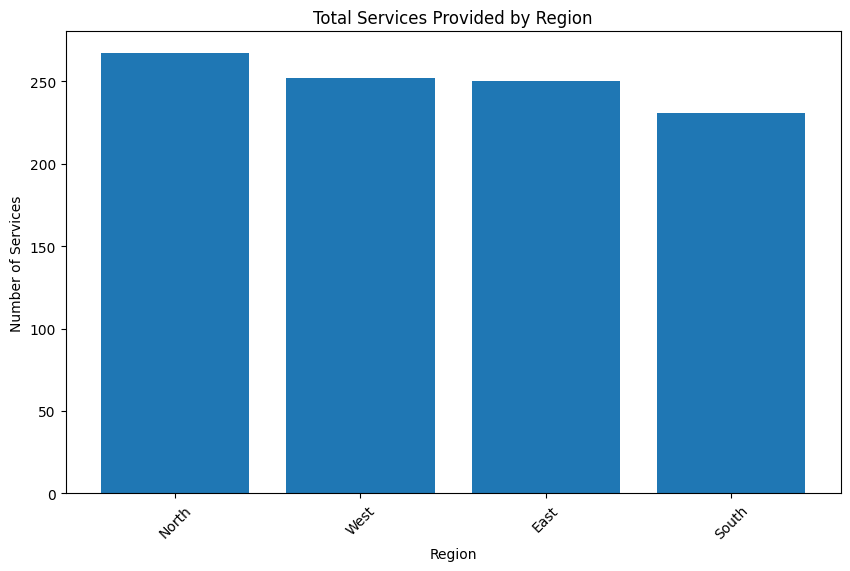

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(total_Services_by_region.index, total_Services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_Services_by_region.png')
plt.show()

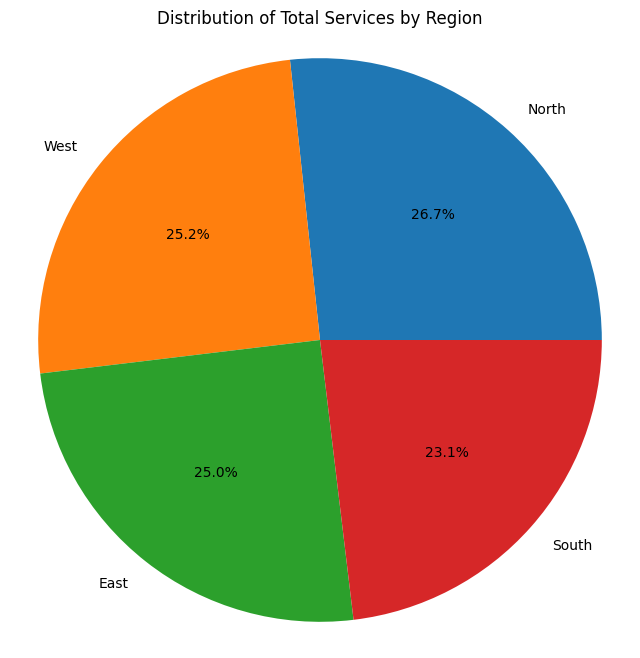

In [37]:
plt.figure(figsize=(8,8))
plt.pie(total_Services_by_region, labels=total_Services_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of Total Services by Region')
plt.axis('equal')
plt.savefig('Service_distribution_by_region.png')
plt.show()

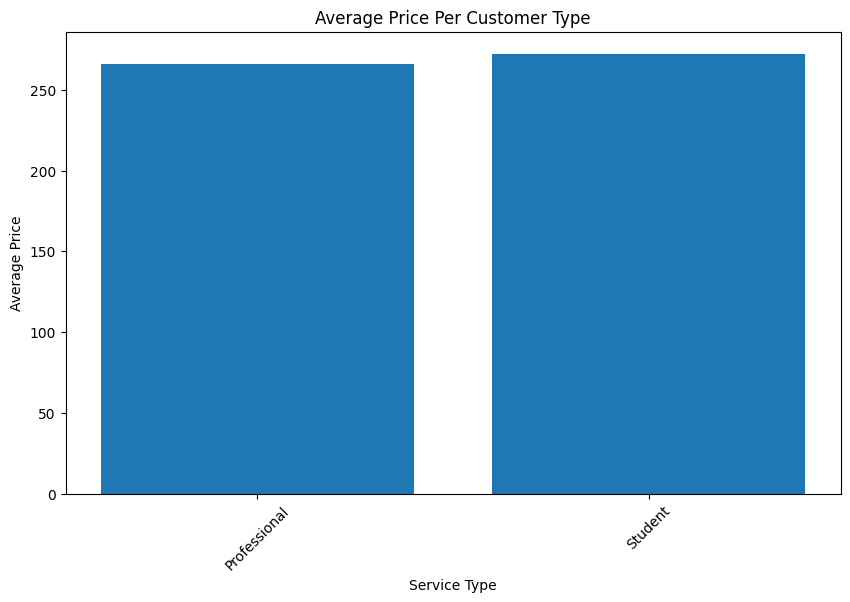

In [43]:
plt.figure(figsize=(10,6))
plt.bar(average_price_per_Service.index, average_price_per_Service.values)
plt.title('Average Price Per Customer Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_Service.png')
plt.show()

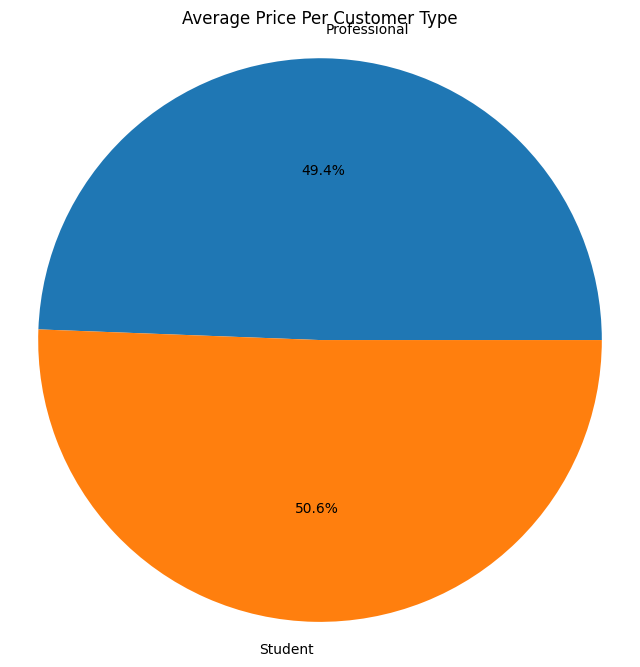

In [44]:
plt.figure(figsize=(8,8))
plt.pie(average_price_per_Service, labels=average_price_per_Service.index, autopct='%1.1f%%')
plt.title('Average Price Per Customer Type')
plt.axis('equal')
plt.savefig('average_price_per_Service.png')
plt.show()


Saving output in file

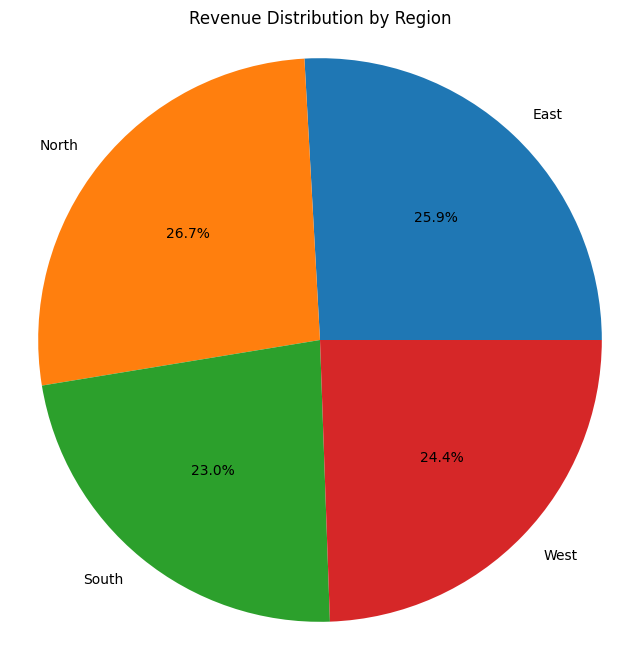

In [45]:
plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.axis('equal')
plt.savefig('revenue_distribution_by_region.png')
plt.show()

saving output in file

In [47]:
with open('analysis_output.txt', 'w') as file:
    file.writelines(output)